<a href="https://colab.research.google.com/github/lRodz/A3_Stroke/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando todas as bibliotecas que utilizamos
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
df = pd.read_csv('healthcare-dataset-stroke-data (1).csv')

In [ ]:
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
#Dropar colunas(ID)
df.drop(columns=['id'], inplace=True)
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
#Renomear colunas
df.rename(columns={
    'gender': 'Genero',
    'age' : 'Idade',
    'hypertension' : 'Hipertensao',
    'heart_disease' : 'Doenca_Coracao',
    'ever_married' : 'Casado',
    'work_type' : 'Tipo_de_Trabalho',
    'Residence_type' : 'Residencia',
    'avg_glucose_level' : 'Nivel_Glucose',
    'bmi' : 'bmi',
    'smoking_status' : 'fumante',
    'stroke' : 'ataque_cardiaco'
}, inplace=True)
print(df.columns)

Index(['Genero', 'Idade', 'Hipertensao', 'Doenca_Coracao', 'Casado',
       'Tipo_de_Trabalho', 'Residencia', 'Nivel_Glucose', 'bmi', 'fumante',
       'ataque_cardiaco'],
      dtype='object')


In [ ]:
#Tradução variáveis
traducao_genero = {'Male':'Masculino','Female' : 'Feminino'}
traducao_casado = {'Yes' : 1, 'No' : 0}
traducao_tipotrabalho = {'Private' : 'Privado', 'Self-employed' : 'Empreendedor', 'Govt_job' : 'Funcionario Publico', 'children' : 'crianca', 'Never_worked' : 'Desempregado'}
traducao_residencia = {'Urban' : 'Urbano', 'Rural' : 'Rural'}
traducao_fumante = {'formerly smoked' : 'sociavelmente', 'never smoked' : 'nunca fumou', 'smokes' : 'fumante', 'Unknown' : 'desconhecido'}

In [ ]:
#Replace Tradução
df['Genero'].replace(traducao_genero,inplace=True)
df['Casado'].replace(traducao_casado,inplace=True)
df['Tipo_de_Trabalho'].replace(traducao_tipotrabalho,inplace=True)
df['Residencia'].replace(traducao_residencia,inplace=True)
df['fumante'].replace(traducao_fumante,inplace=True)

print(df.head())

      Genero  Idade  Hipertensao  Doenca_Coracao  Casado Tipo_de_Trabalho  \
0  Masculino   67.0            0               1       1          Privado   
1   Feminino   61.0            0               0       1     Empreendedor   
2  Masculino   80.0            0               1       1          Privado   
3   Feminino   49.0            0               0       1          Privado   
4   Feminino   79.0            1               0       1     Empreendedor   

  Residencia  Nivel_Glucose   bmi        fumante  ataque_cardiaco  
0     Urbano         228.69  36.6  sociavelmente                1  
1      Rural         202.21   NaN    nunca fumou                1  
2      Rural         105.92  32.5    nunca fumou                1  
3     Urbano         171.23  34.4        fumante                1  
4      Rural         174.12  24.0    nunca fumou                1  


In [ ]:
#Categorização de variáveis
# Idades: 0 - 13(Crianca), 13 - 18(Adolescente), 18 - 65(Adulto), 65+(Idoso)
age_idade = [0,13,18,65, float('inf')]
age_nomes = ['Crianca','Adolescente','Adulto','Idoso']

df['Faixa_Idade'] = pd.cut(df['Idade'], bins=age_idade, labels = age_nomes, right = False)

print(df.head())

      Genero  Idade  Hipertensao  Doenca_Coracao  Casado Tipo_de_Trabalho  \
0  Masculino   67.0            0               1       1          Privado   
1   Feminino   61.0            0               0       1     Empreendedor   
2  Masculino   80.0            0               1       1          Privado   
3   Feminino   49.0            0               0       1          Privado   
4   Feminino   79.0            1               0       1     Empreendedor   

  Residencia  Nivel_Glucose   bmi        fumante  ataque_cardiaco Faixa_Idade  
0     Urbano         228.69  36.6  sociavelmente                1       Idoso  
1      Rural         202.21   NaN    nunca fumou                1      Adulto  
2      Rural         105.92  32.5    nunca fumou                1       Idoso  
3     Urbano         171.23  34.4        fumante                1      Adulto  
4      Rural         174.12  24.0    nunca fumou                1       Idoso  


In [ ]:
#Categorização de variáveis
# Glicose: 0 - 70(Hipoglicemia), 70 - 100(Normal), 100 - 125(Pre_Diabetico), 125+(Diabetico)
glucose_levels = [0,70,100,125, float('inf')]
glucose_nomes = ['Hipoglicemia','diabete_Normal','Pre_Diabetico','Diabetico']

df['Nivel_Glicose'] = pd.cut(df['Nivel_Glucose'], bins=glucose_levels, labels = glucose_nomes, right = False)

print(df.head())

      Genero  Idade  Hipertensao  Doenca_Coracao  Casado Tipo_de_Trabalho  \
0  Masculino   67.0            0               1       1          Privado   
1   Feminino   61.0            0               0       1     Empreendedor   
2  Masculino   80.0            0               1       1          Privado   
3   Feminino   49.0            0               0       1          Privado   
4   Feminino   79.0            1               0       1     Empreendedor   

  Residencia  Nivel_Glucose   bmi        fumante  ataque_cardiaco Faixa_Idade  \
0     Urbano         228.69  36.6  sociavelmente                1       Idoso   
1      Rural         202.21   NaN    nunca fumou                1      Adulto   
2      Rural         105.92  32.5    nunca fumou                1       Idoso   
3     Urbano         171.23  34.4        fumante                1      Adulto   
4      Rural         174.12  24.0    nunca fumou                1       Idoso   

   Nivel_Glicose  
0      Diabetico  
1      Diabe

In [ ]:
#Categorização de variáveis
# BMI: 0 - 18,5(Desnutrido), 18,5 - 25(Normal), 25 - 30(Sobrepeso), 30+(Obeso)
bmi_levels = [0,18.5,25,30, float('inf')]
bmi_nomes = ['Desnutrido','Peso_Normal','Sobrepeso','Obeso']

df['Nivel_BMI'] = pd.cut(df['bmi'], bins=bmi_levels, labels = bmi_nomes, right = False)

print(df.head())

      Genero  Idade  Hipertensao  Doenca_Coracao  Casado Tipo_de_Trabalho  \
0  Masculino   67.0            0               1       1          Privado   
1   Feminino   61.0            0               0       1     Empreendedor   
2  Masculino   80.0            0               1       1          Privado   
3   Feminino   49.0            0               0       1          Privado   
4   Feminino   79.0            1               0       1     Empreendedor   

  Residencia  Nivel_Glucose   bmi        fumante  ataque_cardiaco Faixa_Idade  \
0     Urbano         228.69  36.6  sociavelmente                1       Idoso   
1      Rural         202.21   NaN    nunca fumou                1      Adulto   
2      Rural         105.92  32.5    nunca fumou                1       Idoso   
3     Urbano         171.23  34.4        fumante                1      Adulto   
4      Rural         174.12  24.0    nunca fumou                1       Idoso   

   Nivel_Glicose    Nivel_BMI  
0      Diabetico  

One hot enconding


In [ ]:
#transforma os dados categóricos em númericos(0 e 1), como novas colunas no dataframe

In [ ]:
#criamos variáveis dummys para as categorias do DataFrame e convertemos ela para um tipo inteiro
tp_trabalho = pd.get_dummies(df['Tipo_de_Trabalho'])
tp_trabalho = tp_trabalho.astype(int)

tp_genero = pd.get_dummies(df['Genero'])
tp_genero = tp_genero.astype(int)

tp_residencia = pd.get_dummies(df['Residencia'])
tp_residencia = tp_residencia.astype(int)

tp_Faixa_Idade = pd.get_dummies(df['Faixa_Idade'])
tp_Faixa_Idade = tp_Faixa_Idade.astype(int)

tp_fumante = pd.get_dummies(df['fumante'])
tp_fumante = tp_fumante.astype(int)

tp_Nivel_Glicose = pd.get_dummies(df['Nivel_Glicose'])
tp_Nivel_Glicose = tp_Nivel_Glicose.astype(int)

tp_Nivel_BMI = pd.get_dummies(df['Nivel_BMI'])
tp_Nivel_BMI = tp_Nivel_BMI.astype(int)

In [ ]:
#concatenando as variáveis e adicionando novas colunas
df = pd.concat([df,tp_trabalho, tp_genero,tp_residencia,tp_Faixa_Idade,tp_fumante,tp_Nivel_Glicose,tp_Nivel_BMI],axis = 1)

In [ ]:
print(df)

         Genero  Idade  Hipertensao  Doenca_Coracao  Casado  \
0     Masculino   67.0            0               1       1   
1      Feminino   61.0            0               0       1   
2     Masculino   80.0            0               1       1   
3      Feminino   49.0            0               0       1   
4      Feminino   79.0            1               0       1   
...         ...    ...          ...             ...     ...   
5105   Feminino   80.0            1               0       1   
5106   Feminino   81.0            0               0       1   
5107   Feminino   35.0            0               0       1   
5108  Masculino   51.0            0               0       1   
5109   Feminino   44.0            0               0       1   

         Tipo_de_Trabalho Residencia  Nivel_Glucose   bmi        fumante  ...  \
0                 Privado     Urbano         228.69  36.6  sociavelmente  ...   
1            Empreendedor      Rural         202.21   NaN    nunca fumou  ...   


Removendo variáveis categóricas após o one hot

In [ ]:
#removendo as colunas originais após a concatenação das variáveis dummy
df = df.drop(columns=['Genero','Tipo_de_Trabalho','Residencia',
                      'fumante','Faixa_Idade','Nivel_Glicose','Nivel_BMI'])

In [ ]:
print(df)

      Idade  Hipertensao  Doenca_Coracao  Casado  Nivel_Glucose   bmi  \
0      67.0            0               1       1         228.69  36.6   
1      61.0            0               0       1         202.21   NaN   
2      80.0            0               1       1         105.92  32.5   
3      49.0            0               0       1         171.23  34.4   
4      79.0            1               0       1         174.12  24.0   
...     ...          ...             ...     ...            ...   ...   
5105   80.0            1               0       1          83.75   NaN   
5106   81.0            0               0       1         125.20  40.0   
5107   35.0            0               0       1          82.99  30.6   
5108   51.0            0               0       1         166.29  25.6   
5109   44.0            0               0       1          85.28  26.2   

      ataque_cardiaco  Desempregado  Empreendedor  Funcionario Publico  ...  \
0                   1             0         

Normalização das variáveis

In [ ]:
#Transformação dos dados para um intervalo entre 0 e 1

In [ ]:
#Instaciando um minmax
scaler = MinMaxScaler()

In [ ]:
dataframe_normalizado = scaler.fit_transform(df)

In [ ]:
print(dataframe_normalizado)

[[0.81689453 0.         1.         ... 0.         0.         1.        ]
 [0.74365234 0.         0.         ... 0.         0.         0.        ]
 [0.97558594 0.         1.         ... 0.         0.         1.        ]
 ...
 [0.42626953 0.         0.         ... 0.         0.         1.        ]
 [0.62158203 0.         0.         ... 0.         1.         0.        ]
 [0.53613281 0.         0.         ... 0.         1.         0.        ]]


In [ ]:
df_normalizado = pd.DataFrame(dataframe_normalizado, columns = df.columns)

In [ ]:
print(df_normalizado)

         Idade  Hipertensao  Doenca_Coracao  Casado  Nivel_Glucose       bmi  \
0     0.816895          0.0             1.0     1.0       0.801265  0.301260   
1     0.743652          0.0             0.0     1.0       0.679023       NaN   
2     0.975586          0.0             1.0     1.0       0.234512  0.254296   
3     0.597168          0.0             0.0     1.0       0.536008  0.276060   
4     0.963379          1.0             0.0     1.0       0.549349  0.156930   
...        ...          ...             ...     ...            ...       ...   
5105  0.975586          1.0             0.0     1.0       0.132167       NaN   
5106  0.987793          0.0             0.0     1.0       0.323516  0.340206   
5107  0.426270          0.0             0.0     1.0       0.128658  0.232532   
5108  0.621582          0.0             0.0     1.0       0.513203  0.175258   
5109  0.536133          0.0             0.0     1.0       0.139230  0.182131   

      ataque_cardiaco  Desempregado  Em

In [ ]:
#Limpeza de registros null

In [ ]:
df_normalizado.isnull().sum()

Idade                    0
Hipertensao              0
Doenca_Coracao           0
Casado                   0
Nivel_Glucose            0
bmi                    201
ataque_cardiaco          0
Desempregado             0
Empreendedor             0
Funcionario Publico      0
Privado                  0
crianca                  0
Feminino                 0
Masculino                0
Other                    0
Rural                    0
Urbano                   0
Crianca                  0
Adolescente              0
Adulto                   0
Idoso                    0
desconhecido             0
nunca fumou              0
sociavelmente            0
Hipoglicemia             0
diabete_Normal           0
Pre_Diabetico            0
Diabetico                0
Desnutrido               0
Peso_Normal              0
Sobrepeso                0
Obeso                    0
dtype: int64

In [ ]:
df_not_null = df_normalizado.dropna()

Balanceamento de varariáveis

In [ ]:
#Reduzir o número de variáveis desbalanceadas

In [ ]:
#Oversampling = Pegar a classe com menos dados e aumenta para ficar igual as com mais dados
#Undersampling = Pegar a classe com mais dados e remove elemento para ficar igual as com menos dados

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import ClusterCentroids, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, TomekLinks, AllKNN, InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss, NeighbourhoodCleaningRule, OneSidedSelection

In [ ]:
# Quebra do dataset original pegando uma amostragem maior ou igual a 50%
df_amostra = df_not_null.sample(frac=0.5, random_state=42)
df_amostra.shape

(2454, 32)

In [ ]:
# Quebra do dataset original pegando uma amostragem diferente do que foi usado no df_amostra
indices = ~df_not_null.index.isin(df_amostra.index)
df_teste = df_not_null[indices]
df_teste

,Idade,Hipertensao,Doenca_Coracao,Casado,Nivel_Glucose,bmi,ataque_cardiaco,Desempregado,Empreendedor,Funcionario Publico,...,nunca fumou,sociavelmente,Hipoglicemia,diabete_Normal,Pre_Diabetico,Diabetico,Desnutrido,Peso_Normal,Sobrepeso,Obeso
2,0.975586,0.0,1.0,1.0,0.234512,0.254296,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.597168,0.0,0.0,1.0,0.536008,0.276060,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,1.0,0.549349,0.156930,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.987793,0.0,0.0,1.0,0.605161,0.214204,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.902344,1.0,1.0,1.0,0.069107,0.195876,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,0.829102,0.0,0.0,1.0,0.168775,0.349370,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5100,1.000000,1.0,0.0,1.0,0.077786,0.206186,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5101,0.548340,0.0,0.0,1.0,0.197720,0.162658,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5103,0.218750,0.0,0.0,0.0,0.128012,0.419244,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Separação das colunas preditoras (X) da coluna dependente (y) do df_amostra
X = df_amostra.drop(columns=['ataque_cardiaco','bmi', 'Nivel_Glucose'])
y = df_amostra['ataque_cardiaco']

In [ ]:
#Separação do DataFrame Teste (df_teste) em duas partes, sendo elas:
#X_df_teste = contém todos os dados da coluna exceto 'ataque_cardiaco'
#y_df_teste = contém dados apenas da coluna 'ataque_cardiaco'
X_df_teste = df_teste.drop(columns=['ataque_cardiaco'])
y_df_teste = df_teste['ataque_cardiaco']

In [ ]:
# Quantidade e percentuais de ocorrência das classes do df_amostra
pd.DataFrame({"Nome": y.value_counts().index,
              "Qte." : y.value_counts().values,
              "% Total": round(y.value_counts(normalize=True) * 100, 2).values})

,Nome,Qte.,% Total
0,0.0,2349,95.72
1,1.0,105,4.28


In [ ]:
#### Over Sampling

In [ ]:
##### SMOTE

In [ ]:
# Separação dos dados de treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
#X_smote.shape

In [ ]:
y_smote.value_counts()

ataque_cardiaco
0.0    1880
1.0    1880
Name: count, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Utilizando KNN em dados de treinamento (X_smote) e os rótulos correspondentes (y_smote)
#Revertendo os rótulos do conjunto de teste (X_test) para ser armazenado em (y_pred)
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_smote, y_smote)
y_pred = modelo_knn.predict(X_test)

In [ ]:
previsoes = pd.DataFrame(y_pred)
#previsoes.describe()
#print(previsoes)
print(X_test)

         Idade  Hipertensao  Doenca_Coracao  Casado  Desempregado  \
3251  0.005859          0.0             0.0     0.0           0.0   
2646  0.511719          0.0             0.0     1.0           0.0   
4293  0.001953          0.0             0.0     0.0           0.0   
2820  0.243164          0.0             0.0     0.0           0.0   
1064  0.670410          0.0             0.0     1.0           0.0   
...        ...          ...             ...     ...           ...   
4044  0.584961          0.0             0.0     1.0           0.0   
1672  0.340820          0.0             0.0     0.0           0.0   
1134  0.018066          0.0             0.0     0.0           0.0   
4742  0.584961          0.0             0.0     1.0           0.0   
2635  0.963379          0.0             0.0     1.0           0.0   

      Empreendedor  Funcionario Publico  Privado  crianca  Feminino  ...  \
3251           0.0                  0.0      0.0      1.0       0.0  ...   
2646           0.0 

In [ ]:
#Concatenando o conjunto de testes (X_test) que estão armazenadas em 'previsões'
#Cria um DataFrame (df_performance) e retorna as previsões junto com os dados originais de teste
df_performance = pd.concat([X_test,previsoes], axis = 1)

print(df_performance)

         Idade  Hipertensao  Doenca_Coracao  Casado  Desempregado  \
3251  0.005859          0.0             0.0     0.0           0.0   
2646  0.511719          0.0             0.0     1.0           0.0   
4293  0.001953          0.0             0.0     0.0           0.0   
2820  0.243164          0.0             0.0     0.0           0.0   
1064  0.670410          0.0             0.0     1.0           0.0   
...        ...          ...             ...     ...           ...   
485        NaN          NaN             NaN     NaN           NaN   
486        NaN          NaN             NaN     NaN           NaN   
488        NaN          NaN             NaN     NaN           NaN   
489        NaN          NaN             NaN     NaN           NaN   
490        NaN          NaN             NaN     NaN           NaN   

      Empreendedor  Funcionario Publico  Privado  crianca  Feminino  ...  \
3251           0.0                  0.0      0.0      1.0       0.0  ...   
2646           0.0 

In [ ]:
#Utilizando KNN para fazer as previsões nos dados de treinamento e nos dados de teste
#Assim, gera as previsões: 'y_predict_train' e 'y_predict_test'
y_predict_train = modelo_knn.predict(X_train)
y_predict_test = modelo_knn.predict(X_test)
#y_predict_train = modelo_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Revocação:', recall_score(y_test, y_pred, average='weighted'))
print('Precisão:', precision_score(y_test, y_pred,average='weighted'))

Acurácia: 0.8574338085539714
Revocação: 0.8574338085539714
Precisão: 0.9188687006511292


##Comentar Medida de Avaliação

In [ ]:
#### Under sampling

In [ ]:
#Random
# random_under = RandomUnderSampler(sampling_strategy='majority', random_state=42)
# X_under, y_under = random_under.fit_resample(X_train, y_train)
# X_under.shape

In [ ]:
# modelo_knn2 = KNeighborsClassifier(n_neighbors=3)
# modelo_knn2.fit(X_under, y_under)
# y_pred = modelo_knn2.predict(X_test)

In [ ]:
# print('Acurácia:', accuracy_score(y_test, y_pred))
# print('Revocação:', recall_score(y_test, y_pred, average='weighted'))
# print('Precisão:', precision_score(y_test, y_pred,average='weighted'))

In [ ]:
#matriz de confusão

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_train,y_predict_train))
print(classification_report(y_train,y_predict_train))

print(confusion_matrix(y_test,y_predict_test))
print(classification_report(y_test,y_predict_test))


[[1762  118]
 [   3   80]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1880
         1.0       0.40      0.96      0.57        83

    accuracy                           0.94      1963
   macro avg       0.70      0.95      0.77      1963
weighted avg       0.97      0.94      0.95      1963

[[417  52]
 [ 18   4]]
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       469
         1.0       0.07      0.18      0.10        22

    accuracy                           0.86       491
   macro avg       0.52      0.54      0.51       491
weighted avg       0.92      0.86      0.89       491



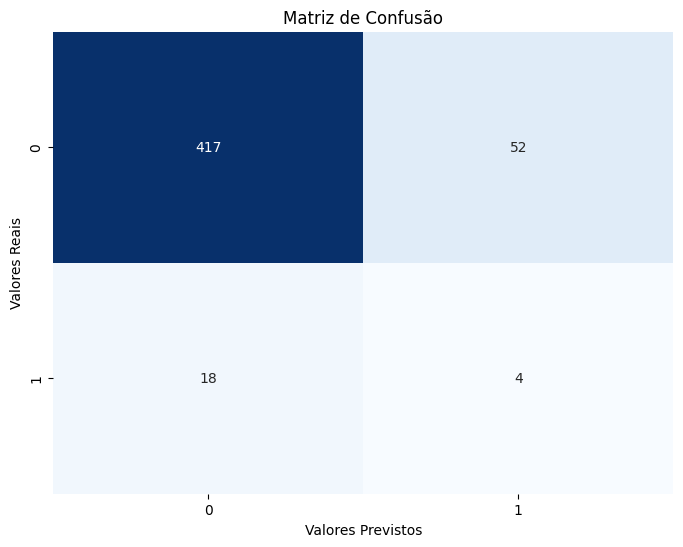

In [ ]:
#Gráfico Matriz de Confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_predict_test)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()


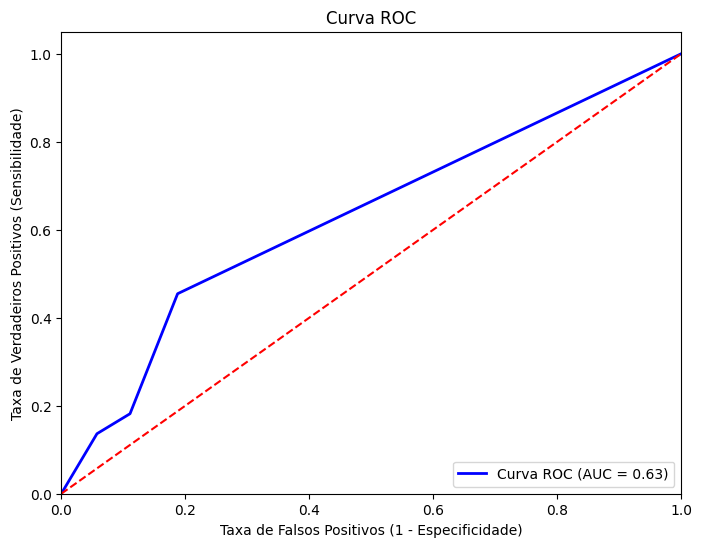

In [ ]:
#Gráfico Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Calcula as probabilidades das classes
y_probs = modelo_knn.predict_proba(X_test)

# Calcula a Curva ROC para a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])

# Calcula a Área sob a Curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs[:, 1])

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


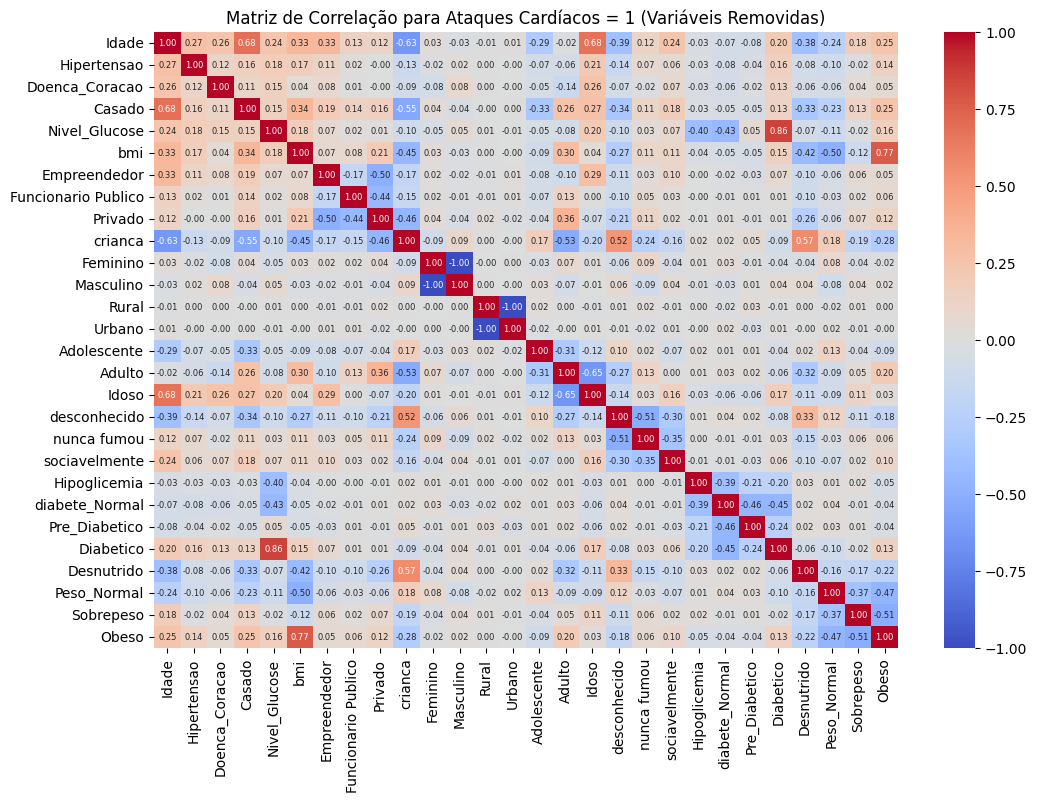

In [ ]:
#HeatMap Matriz de Correlações para Ataque Cardíaco
import seaborn as sns

# Filtrar o conjunto de dados para incluir apenas instâncias com ataque_cardiaco = 1 e remover as variáveis especificadas
df_atq_cardiaco_1_filtered = df_not_null.drop(columns=['ataque_cardiaco', 'Crianca', 'Other', 'Desempregado'])

# Calcular a matriz de correlação
correlation_matrix_filtered = df_atq_cardiaco_1_filtered.corr()

# Plotar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title('Matriz de Correlação para Ataques Cardíacos = 1 (Variáveis Removidas)')
plt.show()


<ipython-input-246-4750c0cf9686>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target_filtered_sorted.values, y=correlation_with_target_filtered_sorted.index, palette='coolwarm')


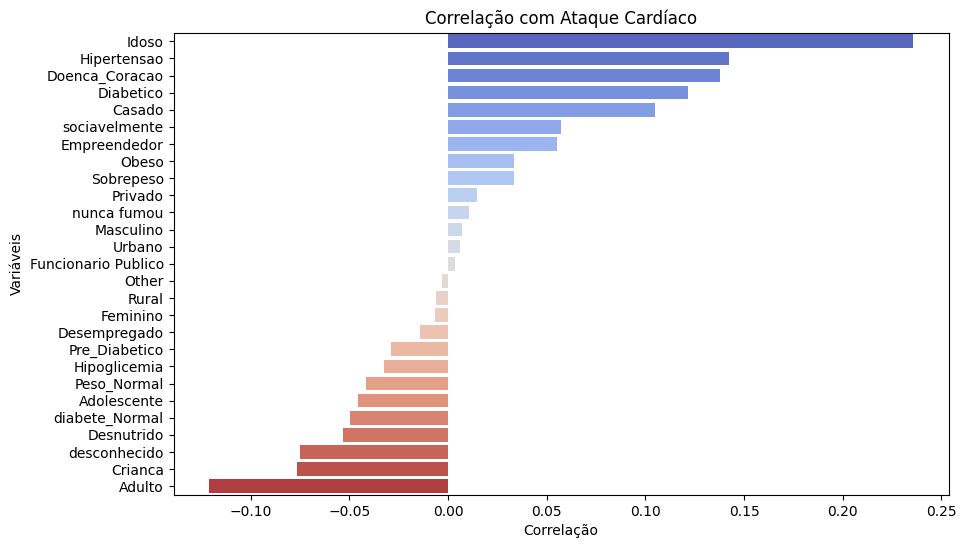

In [ ]:
# Calculate the correlation with the target variable 'ataque_cardiaco'
correlation_with_target = df_not_null.corr()['ataque_cardiaco'].drop('ataque_cardiaco')

# Remove variables that you don't want to include in the analysis
variables_to_drop = ['Idade', 'bmi', 'Nivel_Glucose','crianca']
correlation_with_target_filtered = correlation_with_target.drop(variables_to_drop, errors='ignore')

# Sort the correlations in descending order
correlation_with_target_filtered_sorted = correlation_with_target_filtered.sort_values(ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target_filtered_sorted.values, y=correlation_with_target_filtered_sorted.index, palette='coolwarm')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.title('Correlação com Ataque Cardíaco')
plt.show()


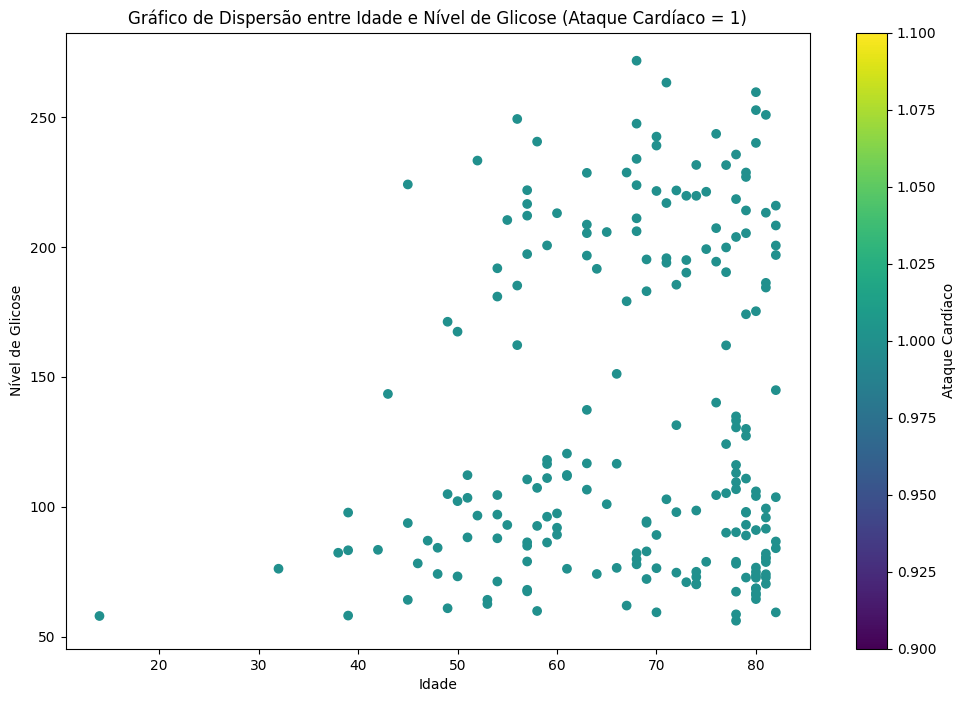

In [ ]:
# Filter the DataFrame to include only instances where ataque_cardiaco = 1
df_amostra_normalizado_ataque_1 = df_amostra_normalizado[df_amostra_normalizado['ataque_cardiaco'] == 1]

# Gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_amostra_normalizado_ataque_1['Idade'],
    df_amostra_normalizado_ataque_1['Nivel_Glucose'],
    c=df_amostra_normalizado_ataque_1['ataque_cardiaco'],  # Use 'ataque_cardiaco' as color
)

plt.colorbar(scatter, label='Ataque Cardíaco')

# Títulos e rótulos
plt.title('Gráfico de Dispersão entre Idade e Nível de Glicose (Ataque Cardíaco = 1)')
plt.xlabel('Idade')
plt.ylabel('Nível de Glicose')
plt.show()
